# Sound Analysis with DTW

Python implementation of [FastDTW](http://cs.fit.edu/~pkc/papers/tdm04.pdf), which is an approximate Dynamic Time Warping (DTW) algorithm that provides optimal or near-optimal alignments with an O(N) time and memory complexity.

### Key Note;
![Euclidean Matching vs Dynamic Time Warping Matchin](https://upload.wikimedia.org/wikipedia/commons/6/69/Euclidean_vs_DTW.jpg)
- [Euclidean Matching vs Dynamic Time Warping Matching](https://commons.wikimedia.org/wiki/File:Euclidean_vs_DTW.jpg)

In [1]:
!pip install fastdtw

### Import Require Modules & Libraries

In [2]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from playsound import playsound

### Listen to individual audio files

In [3]:
playsound('soundbites/doors-and-corners-kid_thats-where-they-get-you.wav')

In [4]:
playsound('soundbites/doors-and-corners-kid_thats-where-they-get-you-2.wav')

In [5]:
playsound('soundbites/you-walk-into-a-room-too-fast_the-room-eats-you.wav')

In [6]:
playsound('soundbites/doors-and-corners-kid.wav')

### Read stored audio files for comparison

In [7]:
fs1, data1 = wavfile.read("soundbites/doors-and-corners-kid_thats-where-they-get-you.wav")
fs2, data2 = wavfile.read("soundbites/doors-and-corners-kid_thats-where-they-get-you-2.wav")
fs3, data3 = wavfile.read("soundbites/you-walk-into-a-room-too-fast_the-room-eats-you.wav")
fs4, data4 = wavfile.read("soundbites/doors-and-corners-kid.wav")

### Take the max values along axis

In [8]:
data1 = np.amax(data1, axis=1)
data2 = np.amax(data2, axis=1)
data3 = np.amax(data3, axis=1)
data4 = np.amax(data4, axis=1)

### Visualizations

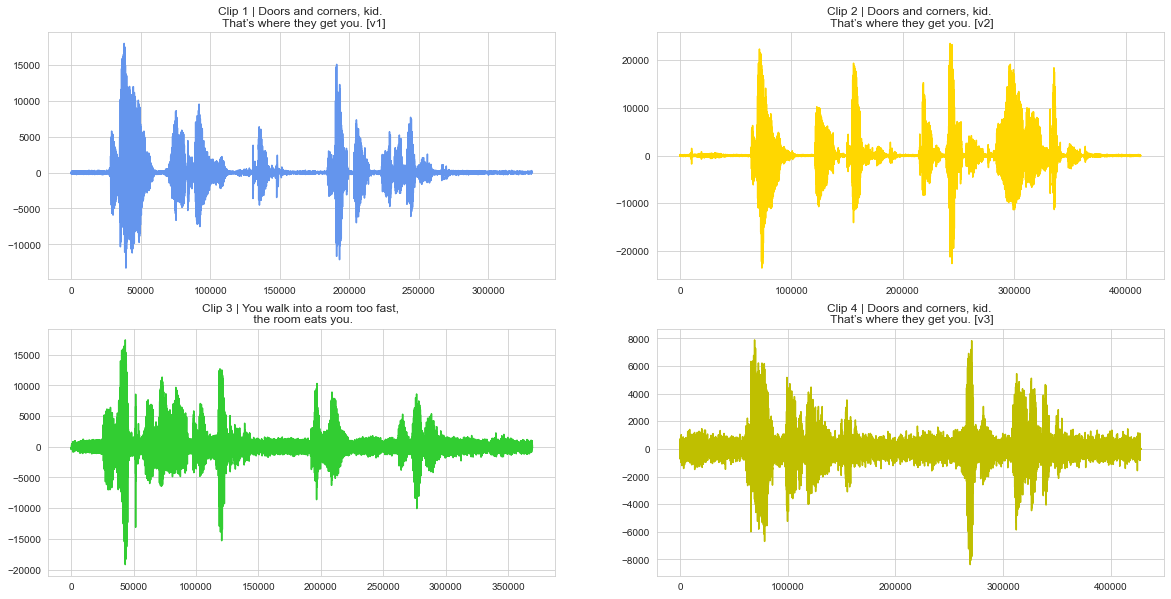

None

In [9]:
# set the seaborn style
sns.set_style("whitegrid")
fig, axs = plt.subplots(2,2 , figsize=(20, 10))
axs[0, 0].plot(data1, color='cornflowerblue')
axs[0, 0].set_title("Clip 1 | Doors and corners, kid. \n That’s where they get you. [v1]")

axs[0, 1].plot(data2, color='gold')
axs[0, 1].set_title("Clip 2 | Doors and corners, kid. \n That’s where they get you. [v2]")

axs[1, 0].plot(data3, color='limegreen')
axs[1, 0].set_title("Clip 3 | You walk into a room too fast, \n the room eats you.")

axs[1, 1].plot(data4, color='y')
axs[1, 1].set_title("Clip 4 | Doors and corners, kid. \n That’s where they get you. [v3]")

# Display created figure
fig=plt.show()
display(fig)

### Compare Clip 2 and Clip 4

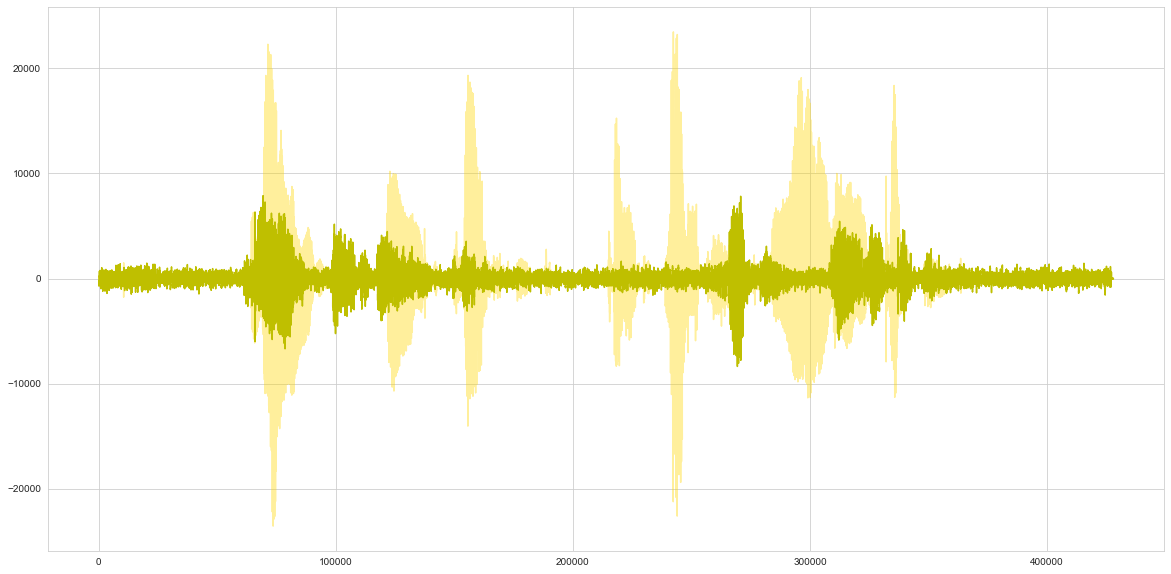

None

In [10]:
fig, ax = plt.subplots(figsize =(20, 10))
ax.plot(data2, color='gold', alpha = 0.39)
ax.plot(data4, color='y')
fig=plt.show()
display(fig)

In [11]:
distance2_4 = fastdtw(data2, data4)[0]
print("The distance between the two clips is %s" % distance2_4)

The distance between the two clips is 404967654.0


### Compare Clip 1 and Clip 2

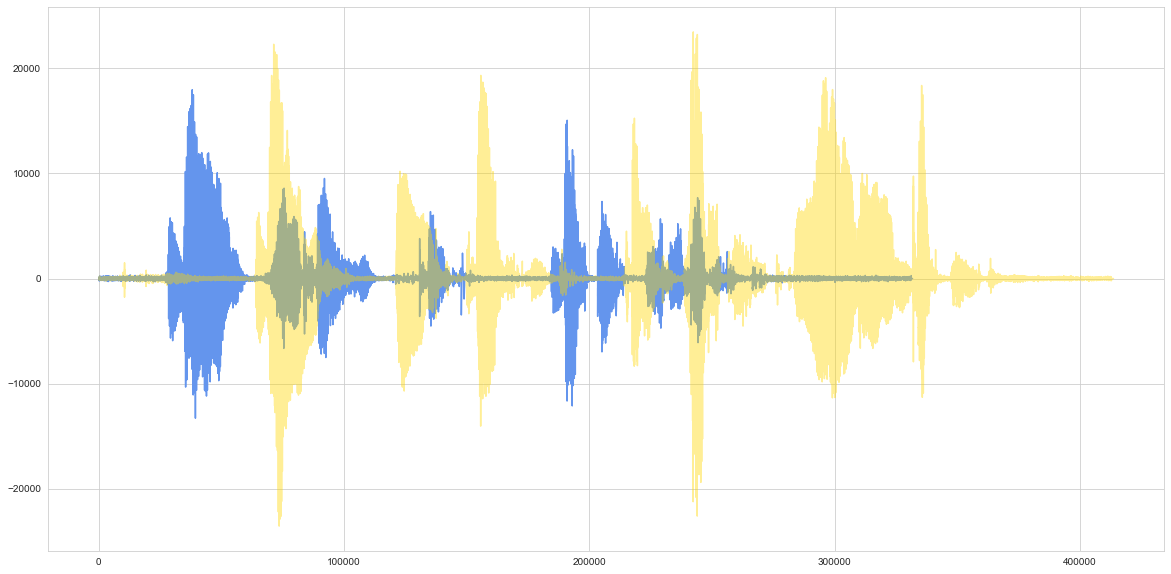

None

In [12]:
fig, ax = plt.subplots(figsize =(20, 10))
ax.plot(data1, color='cornflowerblue')
ax.plot(data2, color='gold', alpha = 0.41)
fig=plt.show()
display(fig)

In [13]:
distance1_2 = fastdtw(data1, data2)[0]
print("The distance between the two clips is %s" % distance1_2)

The distance between the two clips is 480148446.0


### Compare Clip 1 and Clip 4

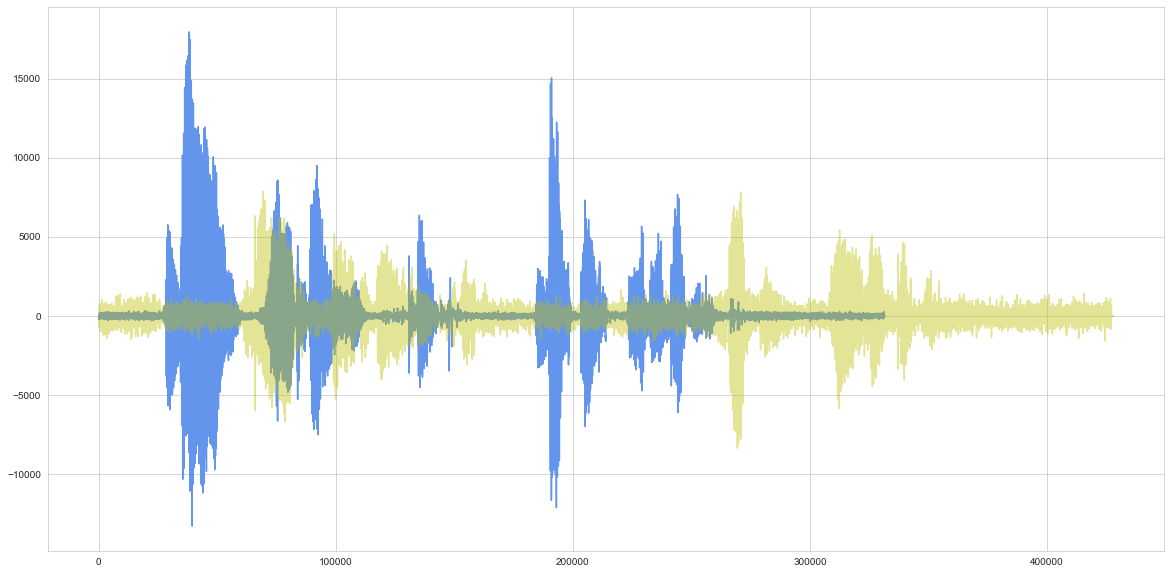

None

In [14]:
fig, ax = plt.subplots(figsize =(20, 10))
ax.plot(data1, color='cornflowerblue')
ax.plot(data4, color='y', alpha = 0.41)
fig=plt.show()
display(fig)

In [15]:
distance1_4 = fastdtw(data1, data4)[0]
print("The distance between the two clips is %s" % distance1_4)

The distance between the two clips is 293547478.0


### Observation

As noted below, when the two clips (in this case, clips 1 and 4) have different intonations (amplitude) and latencies for the same quote.
![clip 1 vs clip 4](soundbites/v1_v4.png)

If we were to follow a traditional **Euclidean matching** even if the amplitudes were discounted , the timings between the original clip (blue) and the new clip (yellow) do not match.

![clip 1 vs clip 4 euclidean matching](soundbites/v1_v4_em.png)


If we were to follow a intuitive **Dynamic Time Warping matching** we can shift time to allow for a time series comparison between the original clip (blue) and the new clip (yellow).
![clip 1 vs clip 4_dynamic time warping](soundbites/v1_v4_dtw.png)

**References**
- DataBrick: The Big Book of Machine Learning Use Case
- Quotes are from ["The Expense"](https://www.amazon.com/The-Expanse-Season-1/dp/B018BZ3SCM)
- Audio data analysis [kdnuggets](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html)